## `Dataset 9`

Nama Dataset : HR Analytics: Job Change of Data Scientists

Goals : Predicting who will transition to a new job

About Dataset : This dataset is designed to understand the factors that lead an individual to leave their current job, making it valuable for HR research as well. Using a model that incorporates credentials, demographics, and current experience data, you will predict the probability of a candidate seeking a new job or staying with their company, as well as interpret the factors influencing employees' decisions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('aug_train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0



`Berikut merupakan List Fitur` : 
1. enrollee_id : Unique ID for candidate
2. city : City code
3. gender : Jenis Kelamin
4. relevent_experience : Has/No Relevant experience
5. enrolled_university : Type of University course enrolled if any
6. education_level : Education Level of candidate
7. major_discipline : Education Major discipline of candidate
8. experience : Candidate total experience in years
9. company_size : No of employees in current employer's company
10. company_type : Type of current employer
11. last_new_job : Difference in years between previous job and current job
12. training_hours : No of training hours completed

Label Target :
13. target : 0 – Not looking for job change, 1 – Looking for a job change

In [6]:
# Check for missing values
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [8]:
# check distribusi
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [9]:
# bagi jadi fitur numerik dan kategorikal
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

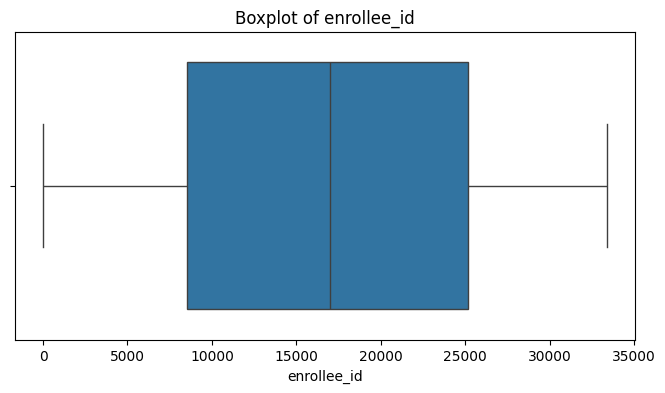

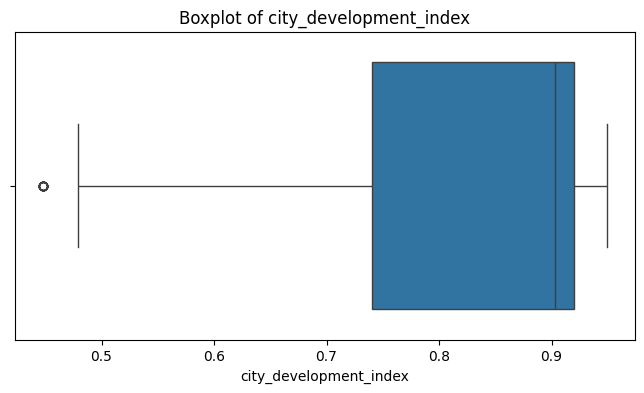

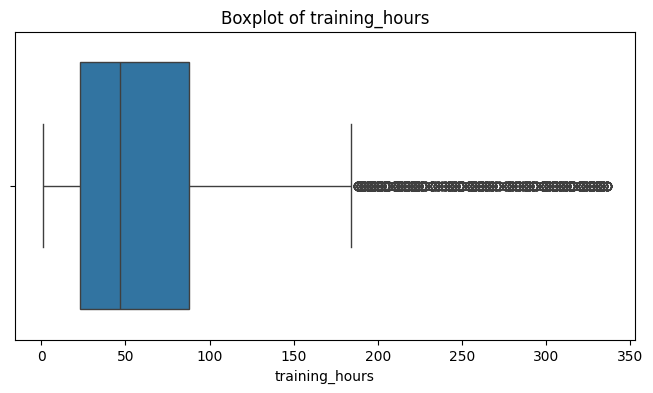

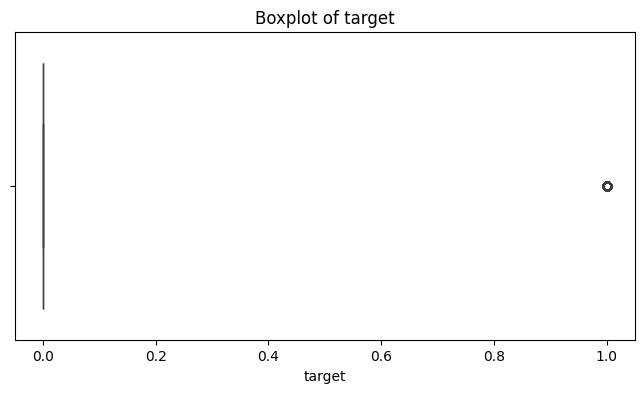

In [11]:
# boxplot untuk kolom numerik
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

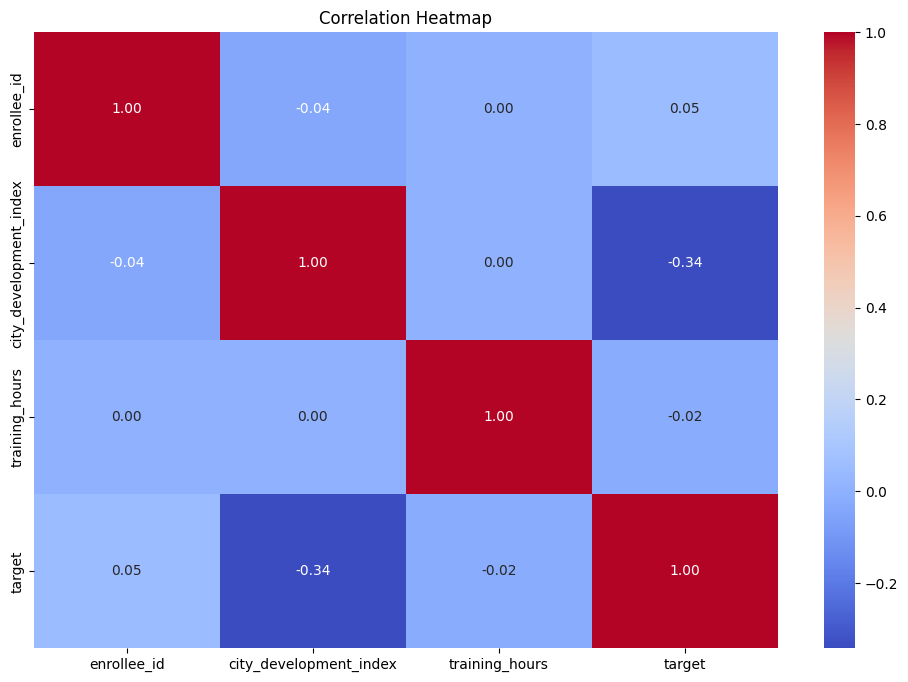

In [ ]:
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
df[categorical_features].head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4


In [ ]:
#cek missing value semua
df.isnull().sum()
#bersihkan missing value


enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [20]:
# uji chi square dan cramer's V untuk fitur kategorikal
from scipy.stats import chi2_contingency

# uji chi square untuk tahu ada hubungan atau tidak dengan target
for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df['target'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f'Chi-square test for {col}: p-value = {p}')
    if p < 0.05:
        print(f'There is a significant association between {col} and target.')
    else:
        print(f'No significant association between {col} and target.')
        

Chi-square test for city: p-value = 0.0
There is a significant association between city and target.
Chi-square test for gender: p-value = 0.9380174725982059
No significant association between gender and target.
Chi-square test for relevent_experience: p-value = 0.000602818259211974
There is a significant association between relevent_experience and target.
Chi-square test for enrolled_university: p-value = 3.2785878848535976e-19
There is a significant association between enrolled_university and target.
Chi-square test for education_level: p-value = 0.0018961179951413145
There is a significant association between education_level and target.
Chi-square test for major_discipline: p-value = 2.8664867410443544e-05
There is a significant association between major_discipline and target.
Chi-square test for experience: p-value = 6.20347251714227e-75
There is a significant association between experience and target.
Chi-square test for company_size: p-value = 0.004085133695253046
There is a signi

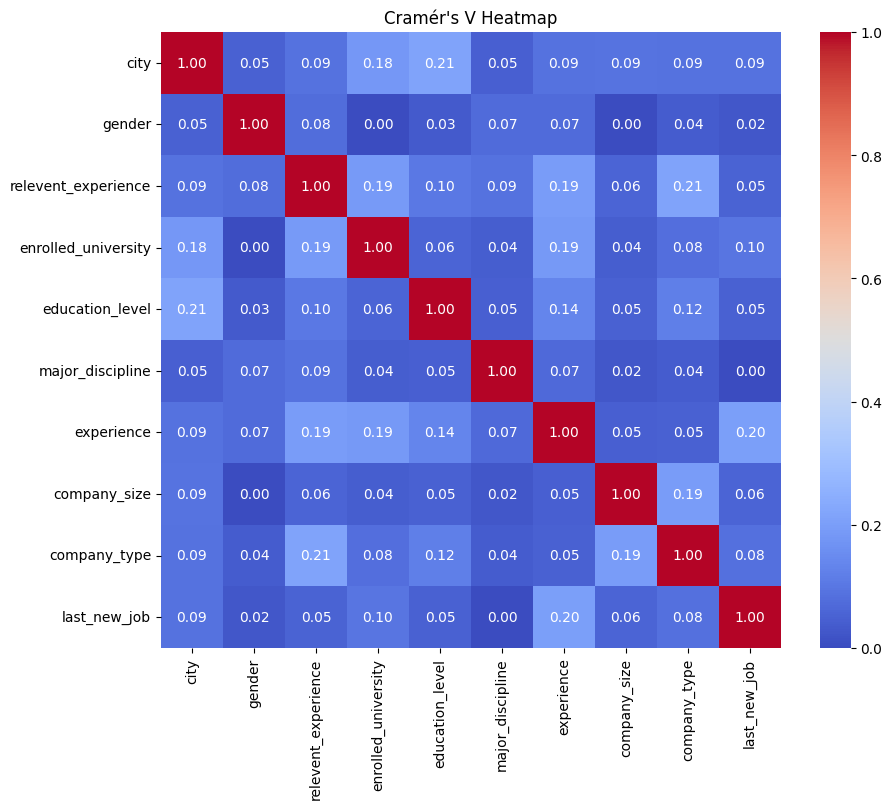

In [21]:
# cramer's v heatmap untuk fitur kategorikal
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
cramers_v_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)
for col1 in categorical_features:
    for col2 in categorical_features:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Cramér's V Heatmap")
plt.show()